In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


# Drawing from multivariate distributions

## Draws from the multivariate normal distribution

Draws from a multivariate normal distribution
$$ N(\mathbf{\mu}, \mathbf{\Sigma}) $$
can be generated by 

1) Calculate the Cholesky decomposition $\mathbf{\Sigma} = \mathbf{R}^T\mathbf{R}$
``` python
    from numpy.linalg import cholesky
    R = cholesky(Sigma)
```

2) Generate standard normally distributed values $\mathbf{Z}$

3) Evaluate $$ \mathbf{X} = \mathbf{\mu 1} + \mathbf{RZ}$$


### Exercise 2.1

Draw 1000 samples from the bivariate distribution
$$ N\left(\left( \begin{array}{c}
0.2 \\ -1.0
\end{array}\right),
\left(\begin{array}{cc}
0.01 & -0.014 \\ -0.014 & 0.04
\end{array}\right)
\right)
$$

In [2]:
draws = 1000

mu = array([0.2, -1.0])
Sigma = array([[0.01, -0.014],[-0.014, 0.04]])
R = linalg.cholesky(Sigma)
Z = random.randn(2,draws)

X = dot(mu[:,newaxis], ones((1, draws))) + dot(R, Z)

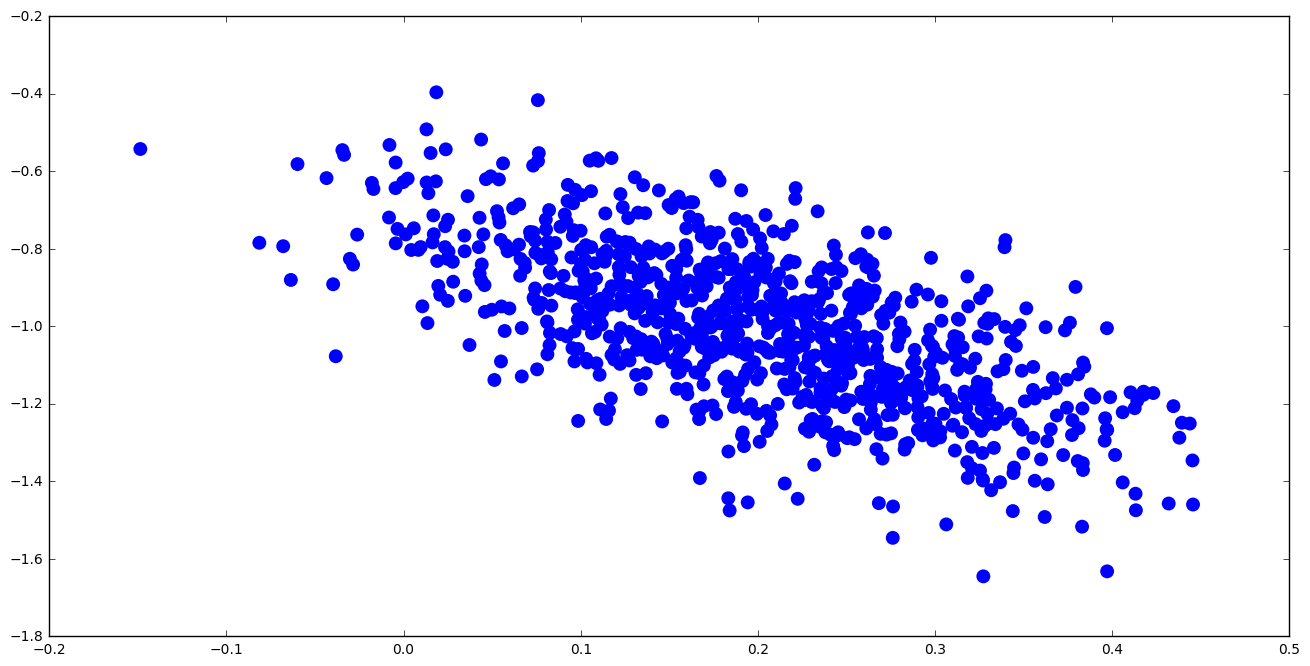

In [3]:
figure()
scatter(X[0,:], X[1,:], 100, edgecolor="none");

Draws from the multivariate normal distribution can more easily generated using the built-in **scipy** functions

```python 
    from scipy.stats import multivariate_normal
    dist = multivariate_normal(mu, Sigma)
    X = dist.rvs(size)
```
**Note**
Scipy *rvs* functions return arrays of shape (number of draws, size of mean)

### Exercise 2.2

Repeat Exercise 2.1 with the built-in scipy function and compare the results.

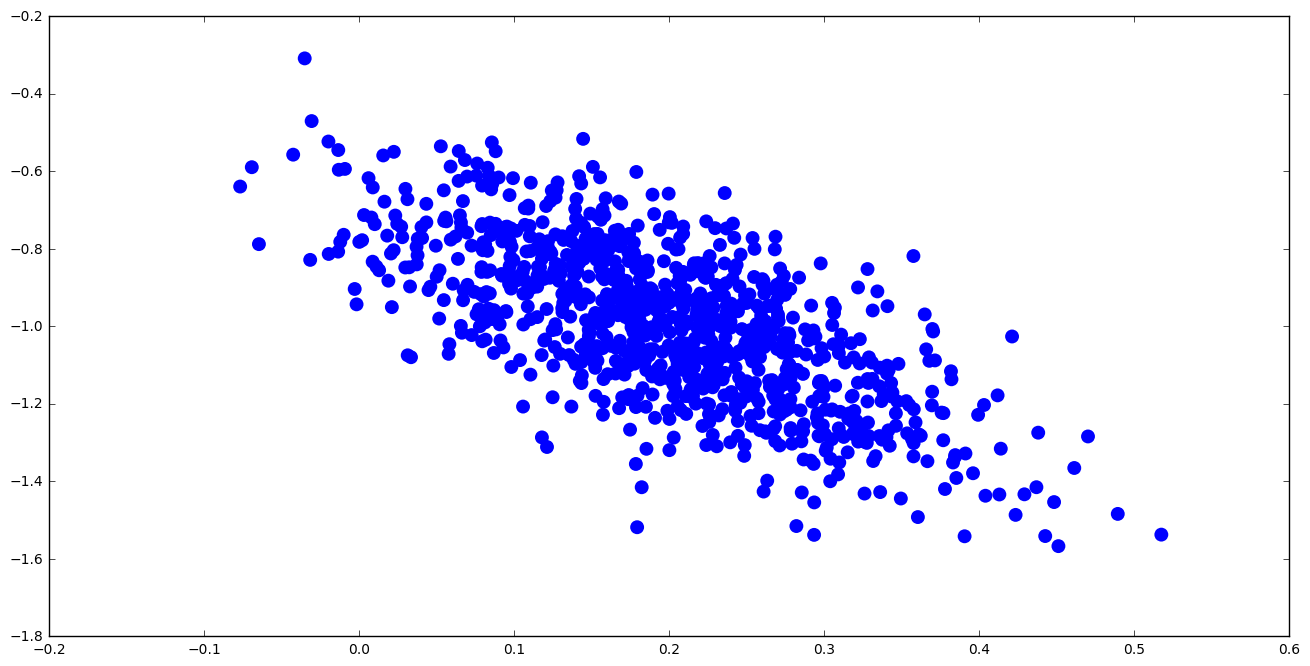

In [4]:
from scipy.stats import multivariate_normal
mu = array([0.2, -1.0])
Sigma = array([[0.01, -0.014],[-0.014, 0.04]])
dist = multivariate_normal(mu, Sigma)
X = dist.rvs(1000)

figure()
scatter(X[:,0], X[:,1], 100, edgecolor="none");

## Draws using a copula function

In many practical cases knowledge about the input quantities is available in terms of their individual distributions and a correlation coefficient. This is insufficient to assign a unique multivariate distribution. Therefore, a copula function can be defined
$$
C(\mu_1,\ldots,\mu_N) = \mathbb{P} \left[ X_1\leq G_{X_1}^{-1}(\mu_1)\ldots,X_N\leq G_{X_N}^{-1}(\mu_N) \right]
$$

### Example copula functions

* all input quantities are mutually independent
$$ C(\mu_1,\ldots,\mu_N) = \prod_{k=1}^N \mu_k $$

* the input quantities are correlated with $\rho\equiv 1$
$$ C(\mu_1,\ldots,\mu_N) = \min_{k} \mu_k $$

* two input quantities are correlated with $\rho$
$$ C(\mu_1,\mu_2) = F_2(G_{X_1}^{-1}(\mu_1),G_{X_2}^{-1}(\mu_2),\rho) $$

The copula can be used to incorporate the correlation coefficient and the individual distributions $g_{X_i}$ to formally define a multivariate distribution. 

#### Example
Input quantities $X_1,X_2$ with correlation coefficient $\rho$ and
\begin{align}
X_1 \sim & N(\mu, \sigma) \\
X_2 \sim & U(a, b)
\end{align}

Use bivariate normal copula function:

1) Draw from bivariate standard normal distribution
$$ z \sim N\left(\mathbf{0}, \left(\begin{array}{cc}
1.0 & \rho \\ \rho & 1.0
\end{array}\right) \right)
$$

2) Evaluate cumulative distribution function of the copula
\begin{align}
\zeta_1 =& G_N(z_1) \\
\zeta_2 =& G_N(z_2) 
\end{align}

3) Evaluate inverse cumulative distribution functions
\begin{align}
x_1 =& G_{X_1}^{-1}(\zeta_1) \\
x_2 =& G_{X_2}^{-1}(\zeta_2)
\end{align}

### Exercise 2.3

Consider the input quantities $X_1,X_2$ with
* $X_1$ has best estimate 0.2 with uncertainty of 50%
* $X_2$ has best estimate -1.0 with uncertainty of 20%
* correlation between $X_1$ and $X_2$ is $\rho=-0.7$

Generate 1000 random draws using a bivariate normal copula function.

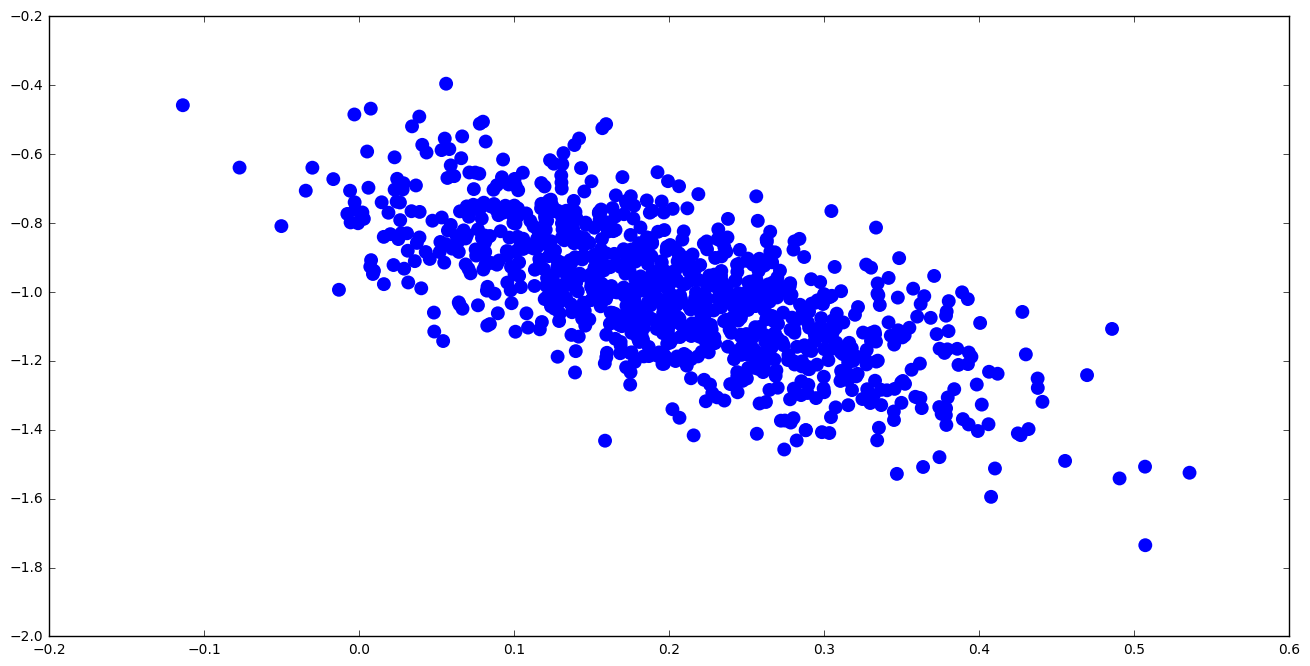

In [5]:
from scipy.stats import norm
rho = -0.7
draws = 1000

mu = array([0, 0])
Sigma = array([[1, rho],[rho,1]])
dist = multivariate_normal(mu, Sigma)
Z = dist.rvs(1000)

zeta1 = norm.cdf(Z[:,0])
zeta2 = norm.cdf(Z[:,1])

X1 = norm.ppf(zeta1, loc=0.2, scale=0.1)
X2 = norm.ppf(zeta2, loc=-1.0, scale=0.2)

figure()
scatter(X1, X2, 100, edgecolor="none");

### Exercise 2.4

Consider the input quantities $X_1, X_2$ with

* $X_1$ has best estimate $x_1=2.4$ with expanded uncertainty $U=0.4 (k=2)$ under normality assumption

* $X_2$ is located in $[-1.5, 1.5]$

* $X_1, X_2$ are correlated with $\rho = 0.4$

Draw 1000 samples from their joint probability distribution using a normal distribution copula function.

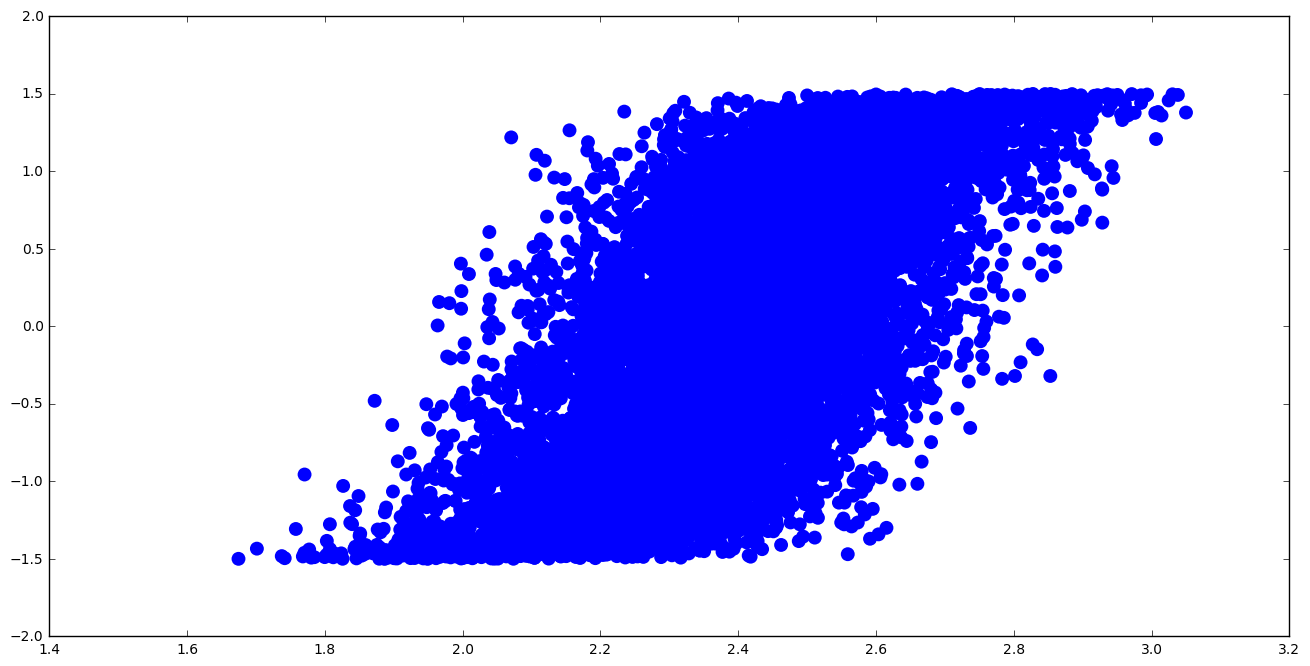

In [9]:
from scipy.stats import norm, uniform, multivariate_normal
rho = 0.7
draws = 10000

copula = multivariate_normal(zeros(2), array([[1.0, rho],[rho, 1.0]]))

z = copula.rvs(draws)

xi1 = norm.cdf(z[:,0])
xi2 = norm.cdf(z[:,1])

X1dist = norm(loc=2.4, scale=0.2)
X2dist = uniform(loc=-1.5, scale=3)
x1 = X1dist.ppf(xi1)
x2 = X2dist.ppf(xi2)

figure(1)
scatter(x1,x2,100,edgecolor="none")

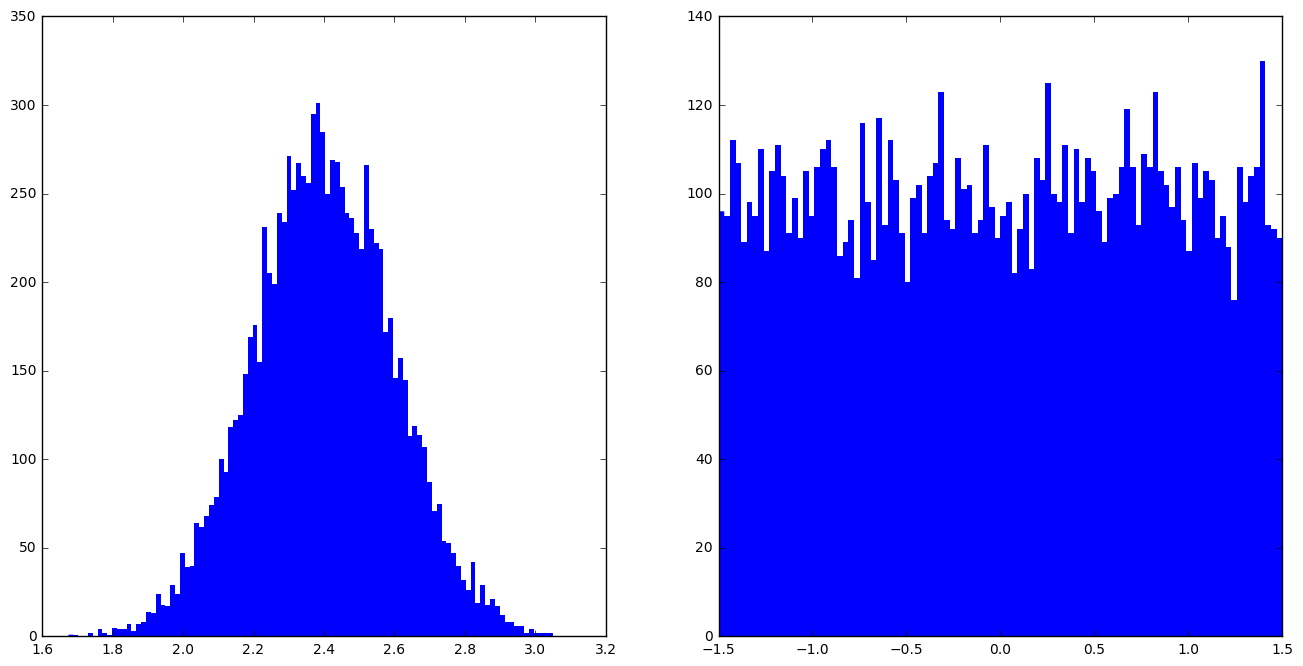

In [10]:
figure()
subplot(121)
hist(x1, bins=100, edgecolor="none")
subplot(122)
hist(x2, bins=100, edgecolor="none");